In [73]:
import numpy as np
import pandas as pd

def load_auto():

	# import data
	Auto = pd.read_csv('Auto.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()

	# Extract relevant data features
	X_train = Auto[['cylinders','displacement','horsepower','weight', 'acceleration','year','origin']].values
	Y_train = Auto[['mpg']].values

	return X_train, Y_train


# **Exercise 3**

In [74]:
#Initialize w,b parameters
X_train,Y_train = load_auto()
print(X_train.shape,Y_train.shape)
w = np.zeros((X_train.shape[1],1))
b = np.zeros((1))

(392, 7) (392, 1)


In [75]:
def model_forward(X_train,w,b):
  z = np.dot(X_train,w) + b
  return z


In [76]:
def compute_loss(z,Y_train):
  J =(1/Y_train.shape[0])* np.sum((Y_train-z)**2)
  return J

In [77]:
#Compute partial derivatives
def model_backwards(X_train,Y_train,z):
  dJ_db = (-2/Y_train.shape[0])*np.sum(Y_train-z)
  dJ_dw = (-2/Y_train.shape[0])*np.dot(X_train.T,(Y_train-z))
  return dJ_db,dJ_dw

In [78]:
def update_parameters(w,b,dJ_db,dJ_dw,alpha):
  w = w - alpha*dJ_dw
  b = b - alpha*dJ_db
  return w,b

In [79]:
def predict(X_train,Y_train,num_iter,alpha,w,b):
  losses = []
  for step in range(num_iter+1):
    #Make initial prediction
    z = model_forward(X_train,w,b)
    #print(f"Prediction at step {step} : ",z)
    #Compute the loss
    J = compute_loss(z,Y_train)
    losses.append(J)
    #print(f'Loss at step {step} : ',J)
    #Compute partial derivatives
    dJ_db,dJ_dw = model_backwards(X_train,Y_train,z)
    #Update parameters
    w,b = update_parameters(w,b,dJ_db,dJ_dw,alpha)
    #print(f'At step {step} : Loss = {J}, prediction = {z.shape} and real target = {Y_train}, dJ_db and dJ_dw = {dJ_db} and {dJ_dw}')
    #If we are done, print the final prediction
    # if step%16:
    #   print(z,J)
  print(f"Final prediction at step {step} : ",z)
  J = compute_loss(z,Y_train)
  losses.append(J)
  print(f'Final loss at step {step} : ',J)

  #return final prediction after training
  return z,w,b,losses

# **Exercise 4**

In [80]:
#Normalization of input variables
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train = (X_train - X_mean)/X_std

In [81]:
#Selection of features from X_train
X_train1 = X_train[:,2].reshape(392,1)
#Name is not included in X_train so i guess we take all of X_train
X_train2 = X_train

In [82]:
w1 = np.zeros((X_train1.shape[1],1))
b1 = np.zeros((1))

w2 = np.zeros((X_train2.shape[1],1))
b2 = np.zeros((1))

In [83]:
# w1 = np.random.normal(0,(0.01)**2,(X_train1.shape[1],Y_train.shape[1]))
# b1 = np.zeros((Y_train.shape[1]))
# w2 = np.random.normal(0,(0.01)**2,(X_train2.shape[1],Y_train.shape[1]))
# b2 = np.zeros((Y_train.shape[1]))

In [84]:
#Fit linear classifiers
num_iter = 2000
alpha = 0.01

#Fit the classifier 1
classifier1 = predict(X_train1,Y_train,num_iter,alpha,w1,b1)
classifier2 = predict(X_train2,Y_train,num_iter,alpha,w2,b2)


Final prediction at step 2000 :  [[19.41604569]
 [13.89148002]
 [16.25915102]
 [16.25915102]
 [17.83759835]
 [ 8.68260382]
 [ 5.21001968]
 [ 5.99924335]
 [ 4.42079602]
 [ 9.94536168]
 [13.10225635]
 [14.68070368]
 [16.25915102]
 [ 4.42079602]
 [24.94061135]
 [24.94061135]
 [24.62492189]
 [26.51905869]
 [26.04552449]
 [32.67500329]
 [26.20336922]
 [25.72983502]
 [24.94061135]
 [22.09940615]
 [25.72983502]
 [ 5.99924335]
 [ 8.36691435]
 [ 6.78846702]
 [ 9.47182748]
 [26.04552449]
 [25.72983502]
 [24.94061135]
 [24.15138769]
 [23.36216402]
 [24.15138769]
 [26.04552449]
 [24.15138769]
 [13.89148002]
 [12.31303268]
 [15.78561682]
 [16.25915102]
 [11.52380902]
 [13.10225635]
 [12.31303268]
 [22.57294035]
 [28.57104022]
 [24.15138769]
 [26.04552449]
 [26.36121395]
 [25.72983502]
 [28.88672969]
 [27.93966129]
 [29.67595335]
 [29.04457442]
 [30.46517702]
 [28.88672969]
 [24.94061135]
 [27.30828235]
 [31.41224542]
 [25.72983502]
 [26.36121395]
 [13.89148002]
 [12.31303268]
 [16.25915102]
 [15.78

In [85]:
#Writing mathematical expressions
print(f"For classifier 1 : z = X * {classifier1[1]} + {classifier1[2]}")
print(f"For classifier 1 : z = X * {classifier2[1]} + {classifier2[2]}")

For classifier 1 : z = X * [[-6.0678724]] + [23.44591837]
For classifier 1 : z = X * [[-0.51003969]
 [ 1.29959904]
 [-0.70247125]
 [-5.07598103]
 [ 0.11522233]
 [ 2.73289309]
 [ 1.10339566]] + [23.44591837]


In [86]:
learning_rates = [1,0.1,0.01,0.001,0.0001]
num_iter = 1000
costs_per_alpha1 = []
costs_per_alpha2 = []
for alpha in learning_rates:
  classifier1 = predict(X_train1,Y_train,num_iter,alpha,w1,b1)
  costs_per_alpha1.append(classifier1[3])
  classifier2 = predict(X_train2,Y_train,num_iter,alpha,w2,b2)
  costs_per_alpha2.append(classifier2[3])


Final prediction at step 1000 :  [[ 1.49963442e-12]
 [ 3.48730219e-12]
 [ 2.63544458e-12]
 [ 2.63544458e-12]
 [ 2.06753950e-12]
 [ 5.36138895e-12]
 [ 6.61078012e-12]
 [ 6.32682758e-12]
 [ 6.89473266e-12]
 [ 4.90706489e-12]
 [ 3.77125473e-12]
 [ 3.20334965e-12]
 [ 2.63544458e-12]
 [ 6.89473266e-12]
 [-4.88033347e-13]
 [-4.88033347e-13]
 [-3.74452331e-13]
 [-1.05593842e-12]
 [-8.85566901e-13]
 [-3.27076823e-12]
 [-9.42357409e-13]
 [-7.71985885e-13]
 [-4.88033347e-13]
 [ 5.34195792e-13]
 [-7.71985885e-13]
 [ 6.32682758e-12]
 [ 5.47496996e-12]
 [ 6.04287504e-12]
 [ 5.07743641e-12]
 [-8.85566901e-13]
 [-7.71985885e-13]
 [-4.88033347e-13]
 [-2.04080808e-13]
 [ 7.98717303e-14]
 [-2.04080808e-13]
 [-8.85566901e-13]
 [-2.04080808e-13]
 [ 3.48730219e-12]
 [ 4.05520727e-12]
 [ 2.80581610e-12]
 [ 2.63544458e-12]
 [ 4.33915981e-12]
 [ 3.77125473e-12]
 [ 4.05520727e-12]
 [ 3.63824269e-13]
 [-1.79421502e-12]
 [-2.04080808e-13]
 [-8.85566901e-13]
 [-9.99147916e-13]
 [-7.71985885e-13]
 [-1.90779604e-12

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-76-dd6097d38bb9>:2: RuntimeWarning: overflow encountered in square
  J =(1/Y_train.shape[0])* np.sum((Y_train-z)**2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[[19.41604565]
 [13.89147999]
 [16.25915099]
 [16.25915099]
 [17.83759832]
 [ 8.6826038 ]
 [ 5.21001967]
 [ 5.99924334]
 [ 4.42079601]
 [ 9.94536167]
 [13.10225633]
 [14.68070366]
 [16.25915099]
 [ 4.42079601]
 [24.94061131]
 [24.94061131]
 [24.62492184]
 [26.51905864]
 [26.04552444]
 [32.67500323]
 [26.20336918]
 [25.72983498]
 [24.94061131]
 [22.09940612]
 [25.72983498]
 [ 5.99924334]
 [ 8.36691434]
 [ 6.78846701]
 [ 9.47182747]
 [26.04552444]
 [25.72983498]
 [24.94061131]
 [24.15138765]
 [23.36216398]
 [24.15138765]
 [26.04552444]
 [24.15138765]
 [13.89147999]
 [12.31303266]
 [15.78561679]
 [16.25915099]
 [11.523809  ]
 [13.10225633]
 [12.31303266]
 [22.57294031]
 [28.57104017]
 [24.15138765]
 [26.04552444]
 [26.36121391]
 [25.72983498]
 [28.88672964]
 [27.93966124]
 [29.6759533 ]
 [29.04457437]
 [30.46517697]
 [28.88672964]
 [24.94061131]
 [27.30828231]
 [31.41224537]
 [25.72983498]
 [26.36121391]
 [13.89147999]
 [12.31303266]
 [16.25915099]
 [15.78561679]
 [16.25915099]
 [ 7.10415

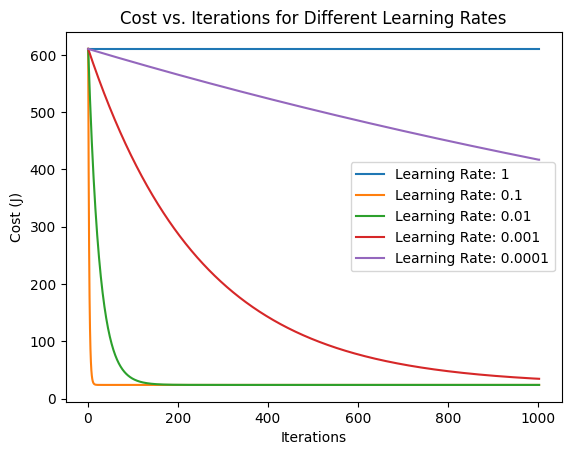

In [87]:
import matplotlib.pyplot as plt

iterations = range(1, 1003)

fig, ax = plt.subplots()

# Iterate through each learning rate and corresponding cost data
for alpha, costs in zip(learning_rates, costs_per_alpha1):
    ax.plot(iterations, costs, label=f"Learning Rate: {alpha}")

# Set labels, title, and legend
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost (J)")
ax.set_title("Cost vs. Iterations for Different Learning Rates")
ax.legend()

plt.show()

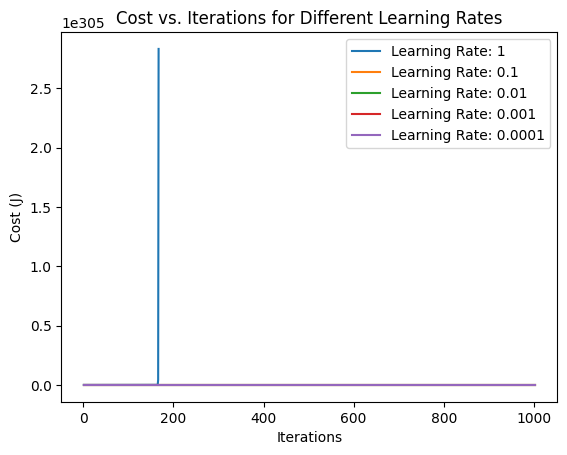

In [88]:
import matplotlib.pyplot as plt

iterations = range(1, 1003)

# Create the figure and axis object
fig, ax = plt.subplots()

# Iterate through each learning rate and corresponding cost data
for alpha, costs in zip(learning_rates, costs_per_alpha2):
    ax.plot(iterations, costs, label=f"Learning Rate: {alpha}")

# Set labels, title, and legend
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost (J)")
ax.set_title("Cost vs. Iterations for Different Learning Rates")
ax.legend()
plt.show()

We can't see the whole graph since with learning rate = 1, the loss goes to inf. We remove it to view the graph properly

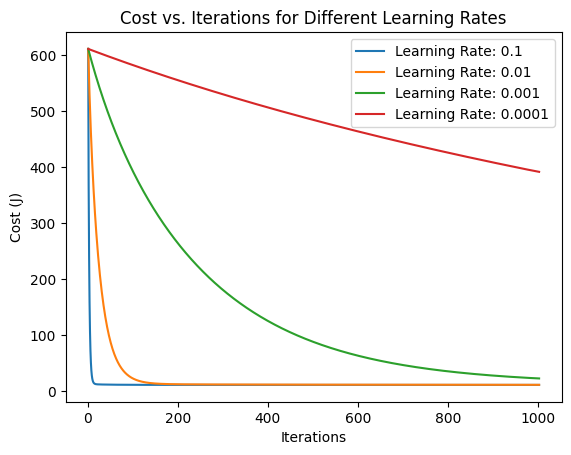

In [89]:
import matplotlib.pyplot as plt

iterations = range(1, 1003)

# Create the figure and axis object
fig, ax = plt.subplots()

# Iterate through each learning rate and corresponding cost data
for alpha, costs in zip(learning_rates[1:], costs_per_alpha2[1:]):
    ax.plot(iterations, costs, label=f"Learning Rate: {alpha}")

# Set labels, title, and legend
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost (J)")
ax.set_title("Cost vs. Iterations for Different Learning Rates")
ax.legend()

# Show the plot
plt.show()

Final prediction at step 2000 :  [[19.41604569]
 [13.89148002]
 [16.25915102]
 [16.25915102]
 [17.83759835]
 [ 8.68260382]
 [ 5.21001968]
 [ 5.99924335]
 [ 4.42079602]
 [ 9.94536168]
 [13.10225635]
 [14.68070368]
 [16.25915102]
 [ 4.42079602]
 [24.94061135]
 [24.94061135]
 [24.62492189]
 [26.51905869]
 [26.04552449]
 [32.67500329]
 [26.20336922]
 [25.72983502]
 [24.94061135]
 [22.09940615]
 [25.72983502]
 [ 5.99924335]
 [ 8.36691435]
 [ 6.78846702]
 [ 9.47182748]
 [26.04552449]
 [25.72983502]
 [24.94061135]
 [24.15138769]
 [23.36216402]
 [24.15138769]
 [26.04552449]
 [24.15138769]
 [13.89148002]
 [12.31303268]
 [15.78561682]
 [16.25915102]
 [11.52380902]
 [13.10225635]
 [12.31303268]
 [22.57294035]
 [28.57104022]
 [24.15138769]
 [26.04552449]
 [26.36121395]
 [25.72983502]
 [28.88672969]
 [27.93966129]
 [29.67595335]
 [29.04457442]
 [30.46517702]
 [28.88672969]
 [24.94061135]
 [27.30828235]
 [31.41224542]
 [25.72983502]
 [26.36121395]
 [13.89148002]
 [12.31303268]
 [16.25915102]
 [15.78

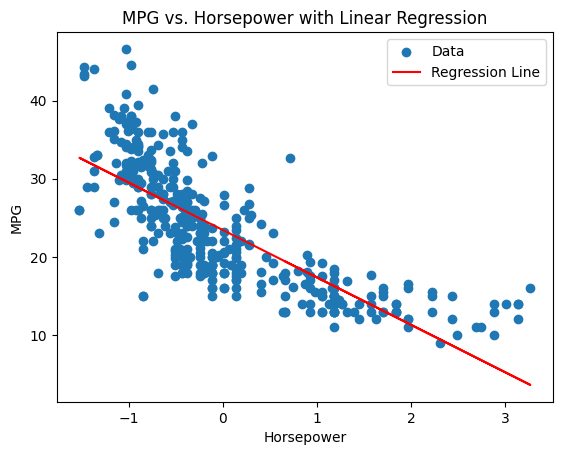

In [91]:

# Assuming you have the following:
# - X_train: Your training data (with horsepower as one of the features)
# - Y_train: Corresponding target values (mpg)
# - w: The trained weight vector
# - b: The trained bias

# Select the horsepower feature (assuming it's the first column)
horsepower = X_train1

# Calculate predictions based on the linear model
classifier1 = predict(X_train1,Y_train,2000,0.1,w1,b1)
predictions = classifier1[0]

# Create the scatter plot
plt.scatter(horsepower, Y_train, label='Data')

# Plot the regression line
plt.plot(horsepower, predictions, color='red', label='Regression Line')

# Labels, title, and legend
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs. Horsepower with Linear Regression")
plt.legend()

# Show the plot
plt.show()

# **Classification Problem**

In [92]:
#Add a softmax function to the output to handle this as a classification problem. Try to predict the origin of the car based on the other variables.

#Since we want to predict the Origin of the car, we must fix our X_train and Y_train as :
X_train,Y_train = load_auto()
#Normalization of input variables
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
Y_train = X_train[:,-1].reshape((392,1))
X_train = (X_train - X_mean)/X_std


X_train = X_train[:,0:5]
print(Y_train.shape,X_train.shape)

w = np.zeros((X_train.shape[1],3))
b = np.zeros(3)

(392, 1) (392, 5)


In [93]:
#Since we want to do classification of categorical data, we will one-hot encode out Y_train
num_classes = 3
new_Y_train = np.zeros((Y_train.shape[0], num_classes))
new_Y_train[np.arange(Y_train.shape[0]), (Y_train.flatten() - 1).astype(int)] = 1

In [94]:
#Create new predict function with the softmax function at the end to make our prediction


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def model_forward(X_train,w,b):
  z = np.dot(X_train,w) + b
  return z

def classify(X_train,Y_train,num_iter,alpha,w,b):
  losses = []
  for step in range(num_iter+1):
    #Make initial prediction
    z = model_forward(X_train,w,b)
    #print(f"Prediction at step {step} : ",z)
    #Compute the loss
    J = compute_loss(z,Y_train)
    losses.append(J)
    #print(f'Loss at step {step} : ',J)
    #Compute partial derivatives
    dJ_db,dJ_dw = model_backwards(X_train,Y_train,z)
    #Update parameters
    w,b = update_parameters(w,b,dJ_db,dJ_dw,alpha)
    #print(f'At step {step} : Loss = {J}, prediction = {z.shape} and real target = {Y_train}, dJ_db and dJ_dw = {dJ_db} and {dJ_dw}')
    #If we are done, print the final prediction
    if step == num_iter+1:
       z= model_forward(X_train,w,b)
       #print(f"Final prediction at step {step} : ",z)
       J = compute_loss(z,Y_train)
       losses.append(J)
       #print(f'Final loss at step {step} : ',J)

  #return final prediction after training
  soft_z = softmax(z)


  return soft_z,w,b,losses

In [95]:
num_iter = 1000
alpha = 0.1

classifier = classify(X_train,new_Y_train,num_iter,alpha,w,b)

In [96]:
y_pred = np.argmax(classifier[0], axis=1) +1
y_true = Y_train.flatten().astype(int)

In [97]:
print(f"Predicted values :\n {y_pred} \n\n True values :\n {y_true}")

Predicted values :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 2 3 3 3 1 1 2 2 2 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 3 3 3 3 3 3 3 3 3 3 2 3 3 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 2 3 3
 3 3 3 1 1 3 3 2 2 1 3 3 1 1 1 1 3 2 3 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3
 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 2 2 3 2 3 3 1 2 2 2 3 3 3 3 2 3 3
 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 3 3 3 2 2 1 2 3 2 1 1 1 1 3 3 3 3 3 1 1 1
 1 1 1 1 1 1 1 1 1 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 3 1 1 3 3 3 3 3 2 2 3 2 3 2 2 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 3 3 3 2 1
 1 2 1 3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 1 3 2 2 3 3 3 2 3 3 2 2 2 3 3 3 3 2 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 2 2 3 3 1 1 1 1 2 2 3 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 1 2 3 2 2 2 3 2 2] 

 True values :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 2 2 2 2 2 1 1 1 1 1 3 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 2 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 2 2 2 2 1 3 3

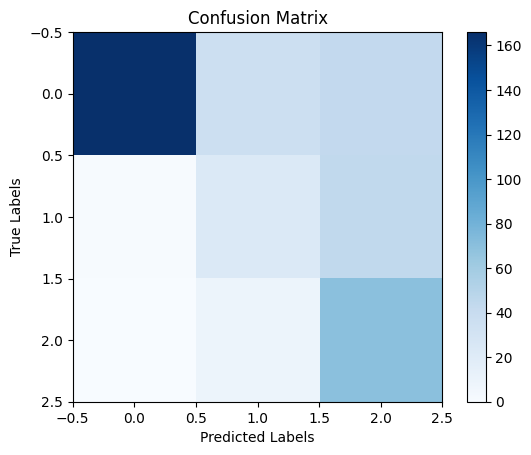

In [98]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.68      0.81       245
           2       0.34      0.34      0.34        68
           3       0.45      0.89      0.59        79

    accuracy                           0.66       392
   macro avg       0.59      0.63      0.58       392
weighted avg       0.77      0.66      0.68       392

